### 全国14个热门城市，搜索数据分析岗位的结果条目，共4087条

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False

In [5]:
data = pd.read_excel(r'C:\Users\lee\Desktop\boss_zhipin.xls',sheet_name='boss_res')

In [9]:
data.head()

,id,job_title,experience,education,company_name,industry,situation,scale,city,area,salary_min,salary_max,full_time,month
0,1,数据分析,1年以内,本科,捷越联合,互联网,不需要融资,1000-9999人,北京,东城区,6,10,是,12
1,2,数据分析师,1-3年,大专,小泽文化,培训机构,未融资,500-999人,北京,NaN,8,12,是,12
2,3,数据分析师（项目管理方向）,1-3年,本科,北京博万管理咨询,汽车生产,A轮,100-499人,北京,NaN,6,8,是,12
3,4,商业化数据分析师,经验不限,本科,茄子快传,互联网,B轮,100-499人,北京,海淀区,15,30,是,12
4,5,数据分析师（车贷业务）,1-3年,本科,北京恒昌利通,互联网金融,未融资,10000人以上,北京,朝阳区,9,14,是,12


### 将id列设为索引

In [10]:
data1 = data.set_index('id')

In [11]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4087 entries, 1 to 4087
Data columns (total 13 columns):
job_title       4087 non-null object
experience      4087 non-null object
education       4087 non-null object
company_name    4087 non-null object
industry        4087 non-null object
situation       4087 non-null object
scale           4087 non-null object
city            4087 non-null object
area            3510 non-null object
salary_min      4087 non-null int64
salary_max      4087 non-null object
full_time       4087 non-null object
month           4087 non-null int64
dtypes: int64(2), object(11)
memory usage: 447.0+ KB


### 去除是实习工作的行，只保留全职工作

In [12]:
drop_lt = data1[data1['full_time']=='否'].index

In [13]:
data2 = data1.drop(drop_lt,axis=0)

In [14]:
data2.info() #删除后还剩4011行，一共删除了76行

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4011 entries, 1 to 4087
Data columns (total 13 columns):
job_title       4011 non-null object
experience      4011 non-null object
education       4011 non-null object
company_name    4011 non-null object
industry        4011 non-null object
situation       4011 non-null object
scale           4011 non-null object
city            4011 non-null object
area            3443 non-null object
salary_min      4011 non-null int64
salary_max      4011 non-null object
full_time       4011 non-null object
month           4011 non-null int64
dtypes: int64(2), object(11)
memory usage: 438.7+ KB


### 增加平均年薪列

In [16]:
data2['salary_max']=data2['salary_max'].astype('int64')

In [18]:
data2['salary_year_avg'] = ((data2['salary_min']+data2['salary_max'])/2)*data2['month']

### 增加平均工资列

In [21]:
data2['salary_avg'] = data2['salary_year_avg']/12

In [22]:
data2.head()

,job_title,experience,education,company_name,industry,situation,scale,city,area,salary_min,salary_max,full_time,month,salary_year_avg,salary_avg
id,,,,,,,,,,,,,,,
1,数据分析,1年以内,本科,捷越联合,互联网,不需要融资,1000-9999人,北京,东城区,6,10,是,12,96.0,8.0
2,数据分析师,1-3年,大专,小泽文化,培训机构,未融资,500-999人,北京,NaN,8,12,是,12,120.0,10.0
3,数据分析师（项目管理方向）,1-3年,本科,北京博万管理咨询,汽车生产,A轮,100-499人,北京,NaN,6,8,是,12,84.0,7.0
4,商业化数据分析师,经验不限,本科,茄子快传,互联网,B轮,100-499人,北京,海淀区,15,30,是,12,270.0,22.5
5,数据分析师（车贷业务）,1-3年,本科,北京恒昌利通,互联网金融,未融资,10000人以上,北京,朝阳区,9,14,是,12,138.0,11.5


### 14城总体工资分布情况

In [42]:
data2['salary_avg'].describe()

count    4011.000000
mean       10.660870
std         7.668183
min         1.500000
25%         5.958333
50%         8.000000
75%        12.500000
max        95.000000
Name: salary_avg, dtype: float64

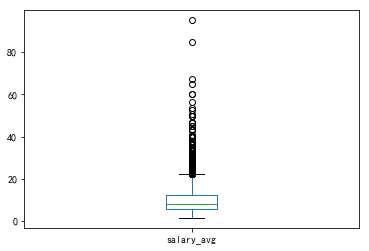

In [41]:
data2['salary_avg'].plot(kind='box')
plt.show()

### 工资的中位数为8k，最低工资1.5k,最高工资95k

In [47]:
data2[data2['salary_avg'].isin([1.5,95])]

,job_title,experience,education,company_name,industry,situation,scale,city,area,salary_min,salary_max,full_time,month,salary_year_avg,salary_avg
id,,,,,,,,,,,,,,,
1712,实习助理（在校生）,经验不限,本科,凤凰房产,互联网,不需要融资,1000-9999人,天津,南开区,1,2,是,12,18.0,1.5
3256,买手,1年以内,学历不限,华宇星空,广播/影视,未融资,20-99人,长沙,开福区,1,2,是,12,18.0,1.5
3555,外贸专员(兼职),1-3年,本科,搜腾数控,贸易/进出口,未融资,0-20人,成都,武侯区,1,2,是,12,18.0,1.5
3919,电商运营学徒,应届生,学历不限,港潮实业,服装/纺织/皮革,未融资,0-20人,重庆,九龙坡区,1,2,是,12,18.0,1.5
4053,产品运营,应届生,本科,犇天科技,电子商务,不需要融资,20-99人,重庆,渝中区,80,110,是,12,1140.0,95.0
4066,实习生,经验不限,学历不限,盈佳同享,其他服务业,100-499人,100-499人,重庆,江北区,1,2,是,12,18.0,1.5


### 发现其中并没有数据分析岗，而是其他的岗位，与这些公司发布职位的分类有关

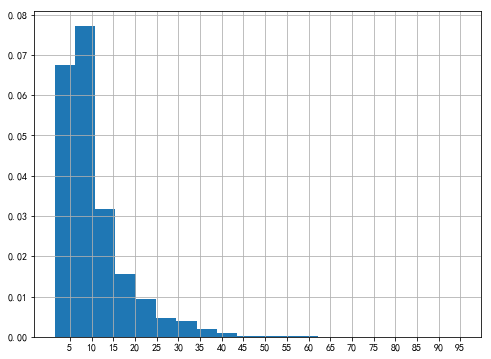

In [54]:
fig,ax = plt.subplots(1,1,figsize=(8,6))
ax.hist(data2['salary_avg'],bins=20,density=True)
#data2['salary_avg'].plot(ax=ax,kind='kde')
ax.set_xticks(range(5,100,5))
ax.grid(True)
plt.show()

### 多数工资为6k-11k左右，其次为3k-6k

### 不同城市的工资情况

In [55]:
data2.city.value_counts()

苏州    298
天津    298
深圳    298
厦门    297
成都    295
重庆    295
武汉    295
广州    292
杭州    288
北京    287
西安    284
长沙    283
上海    281
郑州    220
Name: city, dtype: int64

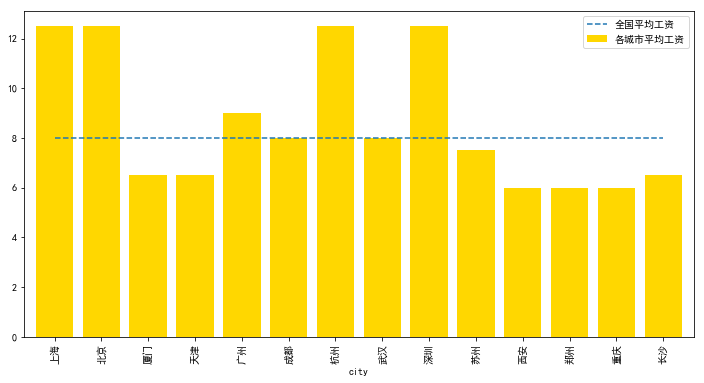

In [75]:
ser = data2.groupby('city')['salary_avg'].median()

fig,a = plt.subplots(1,1,figsize=(12,6))
ser.plot(kind='bar',ax=a,width=0.8,color='gold',label='各城市平均工资')
a.plot(ser.index,np.array(np.random.randint(8,9,14)),linestyle='--',label='全国平均工资')
plt.legend(loc='best')

### 各城市的平均工资都高于6k,其中高于全国平均线的为北京、上海、杭州、深圳、广州

In [76]:
data2.head()

,job_title,experience,education,company_name,industry,situation,scale,city,area,salary_min,salary_max,full_time,month,salary_year_avg,salary_avg
id,,,,,,,,,,,,,,,
1,数据分析,1年以内,本科,捷越联合,互联网,不需要融资,1000-9999人,北京,东城区,6,10,是,12,96.0,8.0
2,数据分析师,1-3年,大专,小泽文化,培训机构,未融资,500-999人,北京,NaN,8,12,是,12,120.0,10.0
3,数据分析师（项目管理方向）,1-3年,本科,北京博万管理咨询,汽车生产,A轮,100-499人,北京,NaN,6,8,是,12,84.0,7.0
4,商业化数据分析师,经验不限,本科,茄子快传,互联网,B轮,100-499人,北京,海淀区,15,30,是,12,270.0,22.5
5,数据分析师（车贷业务）,1-3年,本科,北京恒昌利通,互联网金融,未融资,10000人以上,北京,朝阳区,9,14,是,12,138.0,11.5


### 各学历分布情况

In [95]:
data2['education'].value_counts()

本科       2401
大专       1112
学历不限      299
硕士         88
高中         57
中专/中技      46
初中及以下       4
博士          4
Name: education, dtype: int64

### 要求博士学历的很少，看一下是哪些职位要求博士的

In [106]:
data2[data2['education']=='博士']

,job_title,experience,education,company_name,industry,situation,scale,city,area,salary_min,salary_max,full_time,month,salary_year_avg,salary_avg
id,,,,,,,,,,,,,,,
2613,医学总监,1年以内,博士,亿粲健康,医疗/护理/卫生,不需要融资,0-20人,武汉,武昌区,25,30,是,12,330.0,27.5
2669,博士后,经验不限,博士,武大计算机学院,计算机软件,100-499人,100-499人,武汉,武昌区,10,12,是,12,132.0,11.0
3964,人工智能研发,3-5年,博士,名医在线,互联网,不需要融资,20-99人,重庆,渝北区,15,30,是,12,270.0,22.5
3969,人工智能研发,经验不限,博士,重庆名医在线信息技术,互联网,未融资,20-99人,重庆,渝北区,20,30,是,12,300.0,25.0


### 学历与工资的关系

In [100]:
se = data2.groupby('education')['salary_avg'].median()
se

education
中专/中技     5.750
初中及以下    10.500
博士       23.750
大专        6.500
学历不限      6.000
本科       10.500
硕士       11.375
高中        6.000
Name: salary_avg, dtype: float64

In [101]:
se = se.sort_values(ascending=False)

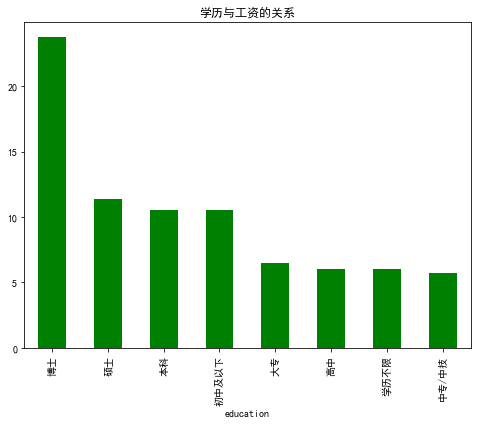

In [105]:
fig,aa = plt.subplots(1,1,figsize=(8,6))
se.plot(kind='bar',color='green')
plt.title('学历与工资的关系')
plt.show()

### 总体而言，学历越高，工资越高

In [103]:
data2[data2['education']=='初中及以下']

,job_title,experience,education,company_name,industry,situation,scale,city,area,salary_min,salary_max,full_time,month,salary_year_avg,salary_avg
id,,,,,,,,,,,,,,,
2814,python java c++,1-3年,初中及以下,纳川,移动互联网,0-20人,0-20人,厦门,同安区,9,14,是,12,138.0,11.5
2975,阿里巴巴运营,5-10年,初中及以下,惠生活餐具,餐饮,不需要融资,0-20人,厦门,翔安区,7,12,是,12,114.0,9.5
3678,产品经理,经验不限,初中及以下,春之翼,通信/网络设备,未融资,100-499人,郑州,二七区,4,6,是,12,60.0,5.0
3993,新开工作室直招手游推广员,应届生,初中及以下,子夜网络,游戏,不需要融资,0-20人,重庆,沙坪坝区,17,18,是,12,210.0,17.5


### 发现初中及以下学历的平均工资与本科一样，高过大专，查询出来的招聘信息如上，可能是这些公司为了在招聘时博得求职者关注，第2814条可能是培训机构

### 工作经验与工资的关系

In [114]:
ss = data2.groupby('experience')['salary_avg'].median()
ss = ss.sort_values()

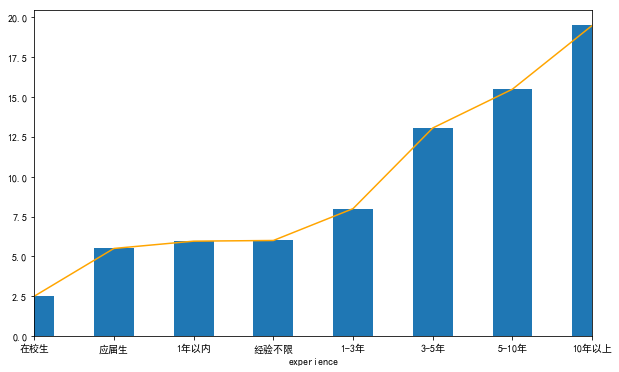

In [120]:
ss.plot(kind= 'bar',figsize=(10,6))
ss.plot(color='orange')
plt.show()

#### 由图可见，工作经验越高，相应的工资越高。经验为一年以内的与经验不限的工资水平基本一样。可以理解为‘1年以内’的意思其实就是经验不限。
#### 从折线斜率看，新人在参加工作的前1-2年工资平稳增长，但越往后，则越值钱，可见数据分析是越老越吃香，与吃青春饭的程序员不一样。

### 行业与工资的关系

In [133]:
data2['industry'].value_counts()

互联网            764
电子商务           481
计算机软件          327
移动互联网          291
互联网金融          183
数据服务           161
生活服务           117
贸易/进出口         107
企业服务           104
医疗健康           102
在线教育           102
游戏              87
广告营销            65
其他行业            64
物流/仓储           58
培训机构            53
咨询              52
O2O             50
批发/零售           49
服装/纺织/皮革        45
工程施工            37
广告/公关/会展        36
通信/网络设备         32
新零售             30
餐饮              30
旅游              29
音乐/视频/阅读        29
信息安全            28
智能硬件            28
其他服务业           27
              ... 
制药               5
美容/美发            5
电力/热力/燃气/水利      5
办公用品及设备          5
汽车零部件            5
农/林/牧/渔          5
印刷/包装/造纸         4
专利/商标/知识产权       4
院校               4
法律               4
石油/石化            4
珠宝/首饰            4
基金               4
计算机硬件            3
证券/期货            3
新闻/出版            3
日化               3
玩具/礼品            3
房地产开发            3
分类信息             3
船舶/航空/航天         2
财务/审计/税务    

### 招聘信息共来自于89个行业，其中最多的是互联网

### 绘制一个以地图为背景的行业分布词云图

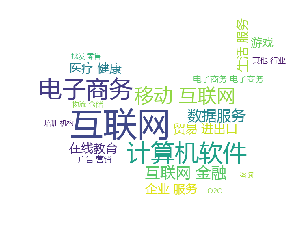

In [204]:
import jieba
import wordcloud
from imageio import imread
mask=imread('Chinamap.jpg')
w = wordcloud.WordCloud(width=1000,height=700,font_path='msyh.ttf',background_color='white',max_words=20,mask=mask)
txt = ','.join(data2['industry'])
ls = jieba.lcut(txt)
txt = ' '.join(ls)
res = w.generate(txt)
plt.axis('off')
plt.imshow(res)

In [ ]:
#挑选前10个热门行业作分析

In [138]:
industry_lt = data2['industry'].value_counts().head(10).index.tolist()
industry_lt

['互联网',
 '电子商务',
 '计算机软件',
 '移动互联网',
 '互联网金融',
 '数据服务',
 '生活服务',
 '贸易/进出口',
 '企业服务',
 '医疗健康']

In [142]:
industry_data = data2[data2['industry'].isin(industry_lt)]

In [152]:
res = industry_data.groupby(['industry','education'])['salary_min'].median()
df = res.unstack(-1)
df

education,中专/中技,初中及以下,博士,大专,学历不限,本科,硕士,高中
industry,,,,,,,,
互联网,8.0,NaN,17.5,5.0,5.0,10.0,12.0,3.5
互联网金融,6.0,NaN,NaN,6.0,6.0,10.0,2.0,10.0
企业服务,10.0,NaN,NaN,4.0,5.0,8.0,7.0,3.0
医疗健康,4.0,NaN,NaN,4.0,8.0,6.0,6.0,5.0
数据服务,NaN,NaN,NaN,6.0,3.5,7.0,8.0,NaN
生活服务,4.0,NaN,NaN,4.0,4.0,6.0,20.0,4.0
电子商务,3.0,NaN,NaN,5.0,5.0,7.0,6.5,6.0
移动互联网,NaN,9.0,NaN,5.0,5.5,11.0,9.5,3.0
计算机软件,3.0,NaN,10.0,6.0,4.0,9.0,11.0,NaN


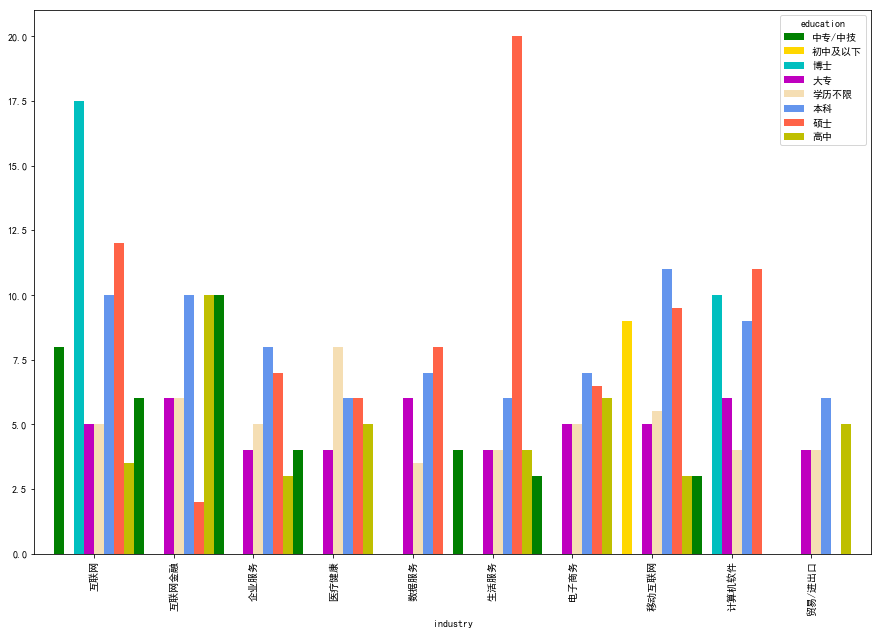

In [172]:
df.plot(kind='bar',figsize=(15,10),width=1,color=['g','gold','c','m','wheat','cornflowerblue','tomato','y'])
plt.show()

### 可见平均工资较高的为生活服务行业的硕士，互联网行业的博士，互联网行业的硕士，移动互联网行业的本科，计算机软件行业的硕士

In [178]:
res1 = industry_data.groupby('industry')['salary_avg'].median()
res1=res1.sort_values(ascending=False)
res1

industry
移动互联网     12.000000
互联网金融     11.000000
互联网       11.000000
计算机软件     10.500000
数据服务       9.208333
企业服务       8.250000
电子商务       7.500000
医疗健康       7.000000
贸易/进出口     6.500000
生活服务       6.000000
Name: salary_avg, dtype: float64

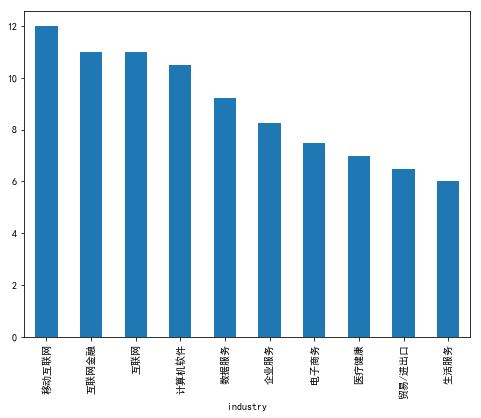

In [181]:
res1.plot(kind='bar',figsize=(8,6))
plt.show()

### 整体平均工资最高前5名行业为：移动互联网，互联网金融，互联网，计算机软件、数据服务。因此在应聘数据分析工作时，需要注意这几个行业的表现较好。

In [208]:
#data2.to_csv(r'C:\Users\lee\Desktop\boss_res.csv',index=False,encoding='utf_8_sig')

### 什么规模的公司会有数据分析岗位招聘需求？

In [212]:
scale_part= data2['scale'].value_counts()
scale_part

20-99人        1162
100-499人      1048
1000-9999人     623
0-20人          497
10000人以上       369
500-999人       312
Name: scale, dtype: int64

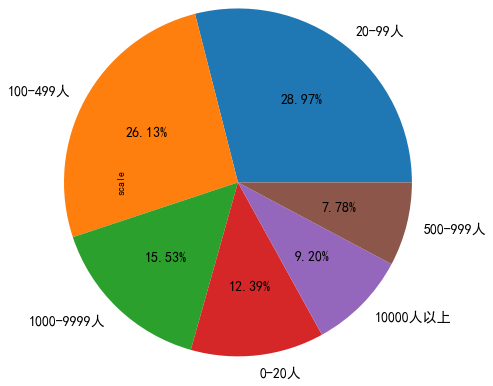

In [219]:
pic,axes = plt.subplots(1,1)
scale_part.plot(kind='pie',autopct='%.2f%%',radius=2,fontsize=14)

### 可见，招聘需求主要来自于100-499的中型公司和20-99的小型公司

## <font color='red'>下面分析一下上海的情况</font>

In [222]:
sh = data2[data2['city']=='上海']

In [223]:
sh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 281 entries, 300 to 598
Data columns (total 15 columns):
job_title          281 non-null object
experience         281 non-null object
education          281 non-null object
company_name       281 non-null object
industry           281 non-null object
situation          281 non-null object
scale              281 non-null object
city               281 non-null object
area               275 non-null object
salary_min         281 non-null int64
salary_max         281 non-null int64
full_time          281 non-null object
month              281 non-null int64
salary_year_avg    281 non-null float64
salary_avg         281 non-null float64
dtypes: float64(2), int64(3), object(10)
memory usage: 35.1+ KB


In [227]:
# area列有几个空值，进行补值
sh.loc[:,'area'] = sh['area'].fillna(method='bfill')

In [228]:
sh.info()

<class 'pandas.core.frame.DataFrame'>
Index: 282 entries, 300 to area
Data columns (total 15 columns):
job_title          281 non-null object
experience         281 non-null object
education          281 non-null object
company_name       281 non-null object
industry           281 non-null object
situation          281 non-null object
scale              281 non-null object
city               281 non-null object
area               281 non-null object
salary_min         281 non-null float64
salary_max         281 non-null float64
full_time          281 non-null object
month              281 non-null float64
salary_year_avg    281 non-null float64
salary_avg         281 non-null float64
dtypes: float64(5), object(10)
memory usage: 45.2+ KB


### 上海各区职位分布情况

In [235]:
sc = sh.groupby('area')['job_title'].count()
sc

area
嘉定区      7
宝山区     14
徐汇区     30
普陀区     13
杨浦区     18
松江区      3
浦东新区    47
虹口区     32
长宁区     28
闵行区     16
青浦区      4
静安区     35
黄浦区     34
Name: job_title, dtype: int64

In [241]:
a =sc.index.tolist()
b = sc.values.tolist()

In [242]:
from pyecharts.charts import Map
from pyecharts import options as opts

c= Map()
c.add("各区职位数量分布", [list(z) for z in zip(a,b,)], "上海")
c.set_global_opts(title_opts=opts.TitleOpts(title="Map-上海地图"),visualmap_opts=opts.VisualMapOpts(max_= 50,range_color=['oldlace','orange']))
c.render_notebook()


In [243]:
sh.head()

,job_title,experience,education,company_name,industry,situation,scale,city,area,salary_min,salary_max,full_time,month,salary_year_avg,salary_avg
id,,,,,,,,,,,,,,,
300,数据分析,3-5年,本科,北极绒,电子商务,B轮,100-499人,上海,杨浦区,8.0,12.0,是,12.0,120.0,10.000000
301,行业数据分析员,1-3年,大专,牛仁电商学院,电子商务,天使轮,20-99人,上海,静安区,3.0,8.0,是,12.0,66.0,5.500000
302,数据分析师,1-3年,本科,平安贷款,互联网金融,已上市,500-999人,上海,浦东新区,10.0,14.0,是,12.0,144.0,12.000000
303,数据分析实习生,经验不限,本科,晋展,游戏,不需要融资,100-499人,上海,嘉定区,4.0,6.0,是,14.0,70.0,5.833333
304,数据分析师,1-3年,本科,淘集集,电子商务,B轮,500-999人,上海,静安区,10.0,15.0,是,12.0,150.0,12.500000


In [246]:
sh['salary_avg'].describe()

count    281.000000
mean      15.159104
std        8.932964
min        3.500000
25%        9.000000
50%       12.500000
75%       19.500000
max       67.500000
Name: salary_avg, dtype: float64

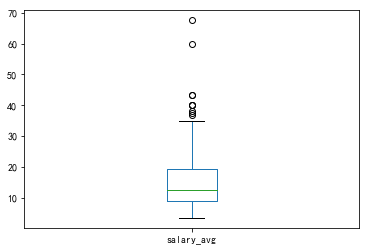

In [245]:
sh['salary_avg'].plot(kind='box')

### 上海市工资的中位数是12.5k，最大值67.5k,最小值3.5k

In [248]:
sh[sh['salary_avg']==67.5]

,job_title,experience,education,company_name,industry,situation,scale,city,area,salary_min,salary_max,full_time,month,salary_year_avg,salary_avg
id,,,,,,,,,,,,,,,
339,数据分析,经验不限,本科,趣头条,移动互联网,已上市,1000-9999人,上海,闵行区,45.0,90.0,是,12.0,810.0,67.5


In [249]:
sh[sh['salary_avg']==3.5]

,job_title,experience,education,company_name,industry,situation,scale,city,area,salary_min,salary_max,full_time,month,salary_year_avg,salary_avg
id,,,,,,,,,,,,,,,
503,数据分析实习生,经验不限,本科,QuantumOne,计算机服务,不需要融资,20-99人,上海,虹口区,3.0,4.0,是,12.0,42.0,3.5


#### 工资最高的是趣头条，最低的是某实习工作

### 上海数据分析行业分布情况

In [268]:
es= sh.groupby('industry')['job_title'].count()
es1 = es.sort_values(ascending=False).head(10)
es1

industry
互联网      84
电子商务     41
计算机软件    29
移动互联网    28
数据服务     17
互联网金融    12
企业服务      9
游戏        7
医疗健康      6
在线教育      5
Name: job_title, dtype: int64

In [266]:
#es1['其他'] = es[es<5].sum()
#es1

industry
互联网      84
电子商务     41
计算机软件    29
移动互联网    28
数据服务     17
互联网金融    12
企业服务      9
游戏        7
医疗健康      6
在线教育      5
其他       38
Name: job_title, dtype: int64

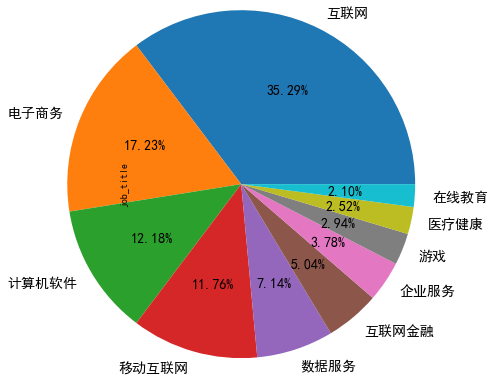

In [269]:
pic,axes = plt.subplots(1,1)
es1.plot(kind='pie',autopct='%.2f%%',radius=2,fontsize=14)

### 大部分来自于互联网，电子商务，计算机软件

### 公司的融资情况及规模情况

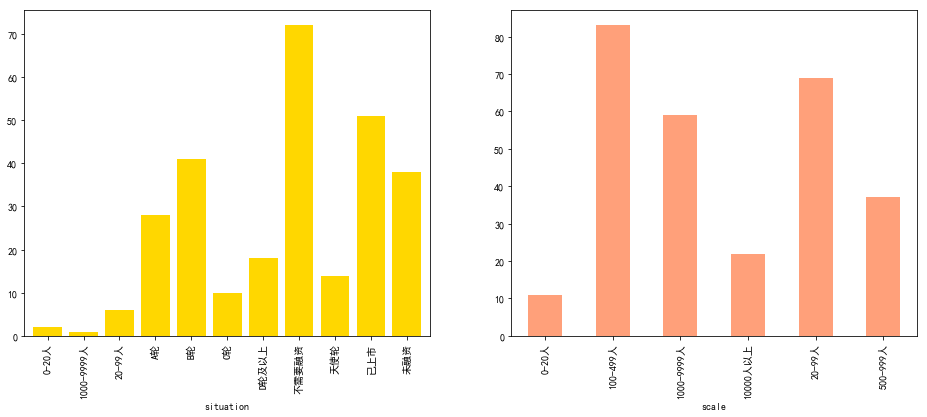

In [291]:
fig,axe = plt.subplots(1,2,figsize=(16,6))
sh.groupby('situation')['job_title'].count().plot(kind='bar',ax=axe[0],color='gold',width=0.8)
sh.groupby('scale')['job_title'].count().plot(kind='bar',ax=axe[1],color='lightsalmon')
plt.subplots_adjust(wspace=0.2,hspace=2)
plt.show()

### 上海的招聘需求主要来自于100-499的中型公司和20-99的小型公司，与全国一样，融资情况最多的是不需要融资和已上市